# Homework #2: Model Training & Decision Trees

**Author:** Anwar Sleiman Haidar
**Course:** SEAS 8505 -- Applied Machine Intelligence and Reinforcement Learning
**Date:** January 2026  
**Dataset:** Iris Dataset

---

## Import Libraries and Load Data


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [3]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Prepare features and target
X = df[iris.feature_names]
y = df['target']

# Split data: 70% training, 30% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nDataset Shape: {df.shape}")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples\n")


Dataset Shape: (150, 6)
Training set: 105 samples
Test set: 45 samples



---
## Part 1: Exploratory Data Analysis (EDA)

Before training any model, it is essential to understand the structure and characteristics of the dataset. The Iris dataset, introduced by Fisher (1936), is a classic benchmark dataset in machine learning containing measurements of iris flowers from three species.

### 1.1 Dataset Overview

In [4]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


### 1.2 Target Variable Identification

In [5]:
print("Target variable: 'species' (numeric encoding)")
print("\nTarget Classes:")
for i, name in enumerate(iris.target_names):
    print(f"  Class {i}: {name}")

print("\nClass Distribution:")
print(df['species'].value_counts(), "\n")

Target variable: 'species' (numeric encoding)

Target Classes:
  Class 0: setosa
  Class 1: versicolor
  Class 2: virginica

Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64 



### 1.3 Feature Classification (Numerical vs. Categorical)

In [6]:
print("\nNumerical Features (all 4 features are continuous):")
for i, feature in enumerate(iris.feature_names, 1):
    print(f"  {i}. {feature}")

print("\nCategorical Features: None")
print("\nNote: The Iris dataset contains only numerical (continuous) features.")

print("\n\nFeature Statistics:\n")
df[iris.feature_names].describe().round(2)


Numerical Features (all 4 features are continuous):
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)

Categorical Features: None

Note: The Iris dataset contains only numerical (continuous) features.


Feature Statistics:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### 1.4 Missing Values Check

In [7]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)
total_missing = missing_values.sum()
if total_missing != 0:
    print(f"\nTotal missing values: {total_missing}\n")
else:
    print("\nIris dataset has NO missing values.\n")


Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Iris dataset has NO missing values.



### 1.5 Data Visualization (combined subplots)

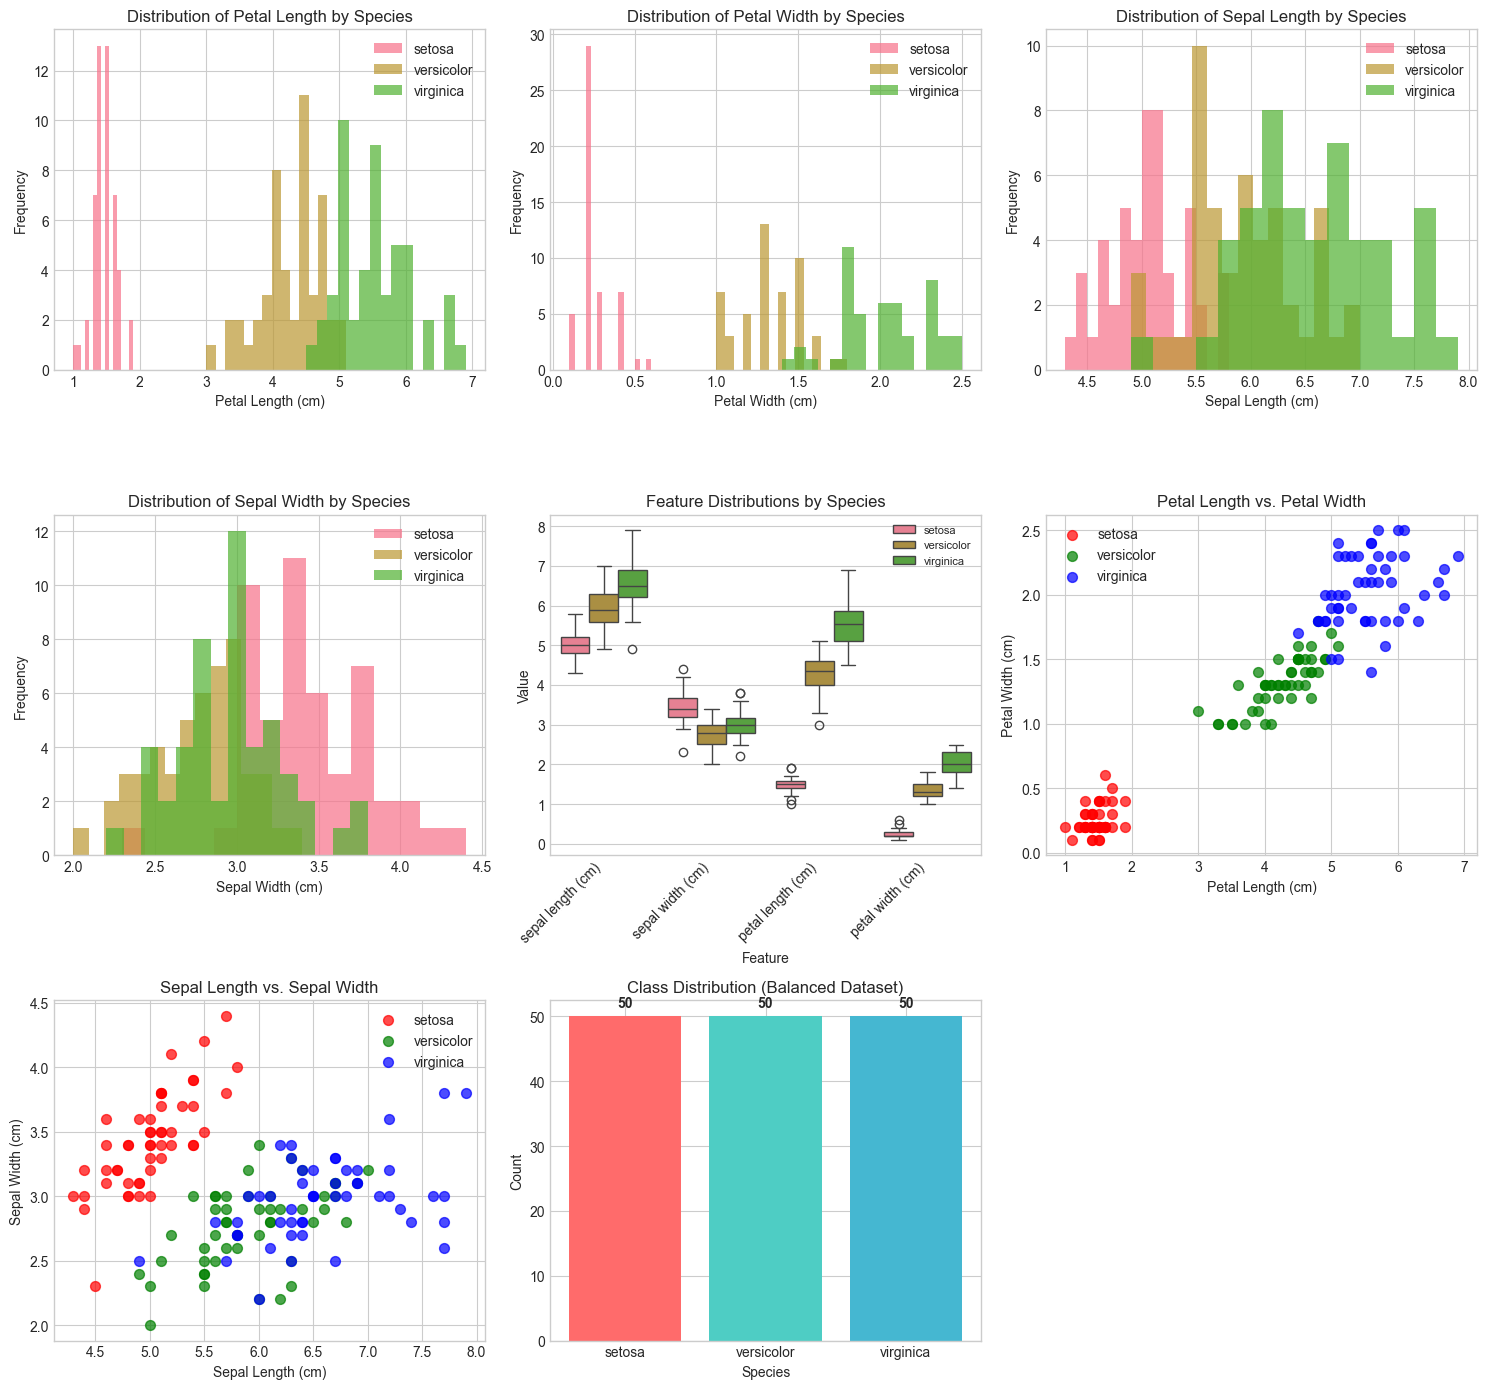


Figure saved as 'iris_visualizations.png'


In [8]:
# Create visualizations - expanded to include all feature distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 14))

# 1. Histogram of Petal Length by Species
ax1 = axes[0, 0]
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax1.hist(subset['petal length (cm)'], alpha=0.7, label=species, bins=15)
ax1.set_xlabel('Petal Length (cm)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Petal Length by Species')
ax1.legend()

# 2. Histogram of Petal Width by Species
ax2 = axes[0, 1]
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax2.hist(subset['petal width (cm)'], alpha=0.7, label=species, bins=15)
ax2.set_xlabel('Petal Width (cm)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Petal Width by Species')
ax2.legend()

# 3. Histogram of Sepal Length by Species
ax3 = axes[0, 2]
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax3.hist(subset['sepal length (cm)'], alpha=0.7, label=species, bins=15)
ax3.set_xlabel('Sepal Length (cm)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Sepal Length by Species')
ax3.legend()

# 4. Histogram of Sepal Width by Species
ax4 = axes[1, 0]
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax4.hist(subset['sepal width (cm)'], alpha=0.7, label=species, bins=15)
ax4.set_xlabel('Sepal Width (cm)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Sepal Width by Species')
ax4.legend()

# 5. Box plot of all features
ax5 = axes[1, 1]
df_melted = df.melt(id_vars=['species'], value_vars=iris.feature_names, 
                     var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value', hue='species', ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
ax5.set_title('Feature Distributions by Species')
ax5.legend(loc='upper right', fontsize=8)

# 6. Scatter plot: Petal Length vs Petal Width
ax6 = axes[1, 2]
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax6.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                c=colors[species], label=species, alpha=0.7, s=50)
ax6.set_xlabel('Petal Length (cm)')
ax6.set_ylabel('Petal Width (cm)')
ax6.set_title('Petal Length vs. Petal Width')
ax6.legend()

# 7. Scatter plot: Sepal Length vs Sepal Width
ax7 = axes[2, 0]
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax7.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                c=colors[species], label=species, alpha=0.7, s=50)
ax7.set_xlabel('Sepal Length (cm)')
ax7.set_ylabel('Sepal Width (cm)')
ax7.set_title('Sepal Length vs. Sepal Width')
ax7.legend()

# 8. Bar chart of class distribution
ax8 = axes[2, 1]
class_counts = df['species'].value_counts()
bars = ax8.bar(class_counts.index, class_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax8.set_xlabel('Species')
ax8.set_ylabel('Count')
ax8.set_title('Class Distribution (Balanced Dataset)')
for bar, count in zip(bars, class_counts.values):
    ax8.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(count), ha='center', va='bottom', fontweight='bold')

# 9. Hide the last empty subplot
axes[2, 2].axis('off')

plt.tight_layout()

# Save the figure
plt.savefig('iris_visualizations.png', dpi=300, bbox_inches='tight')

plt.show()

print("\nFigure saved as 'iris_visualizations.png'")

<hr>

### 1.6 Data Visualization (individual plots)

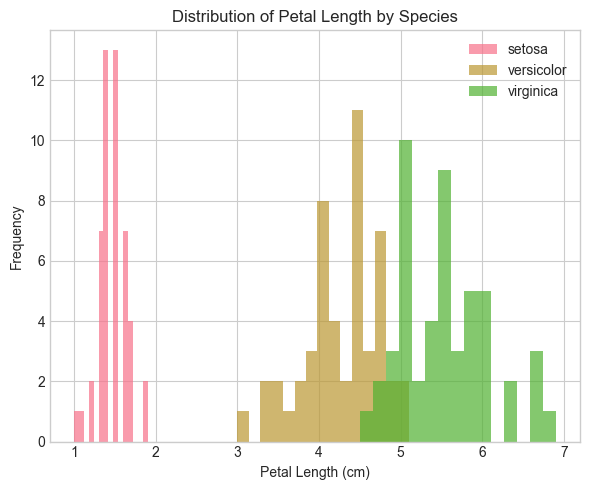

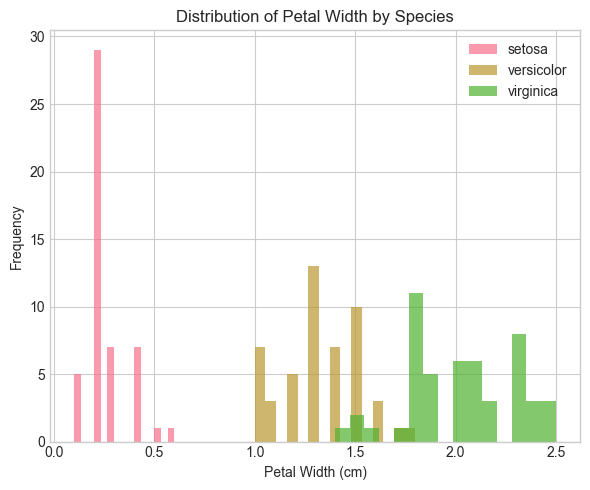

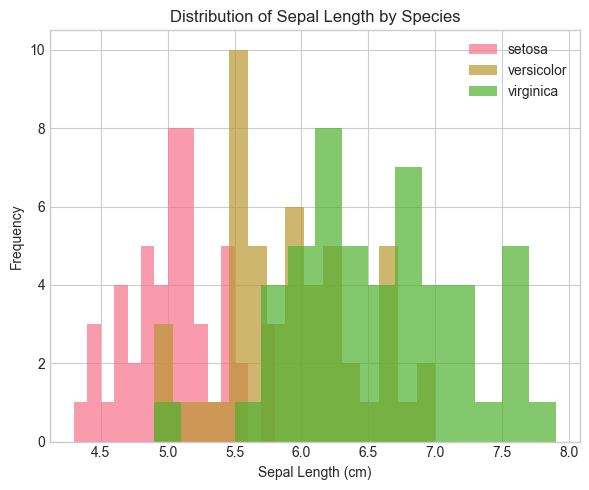

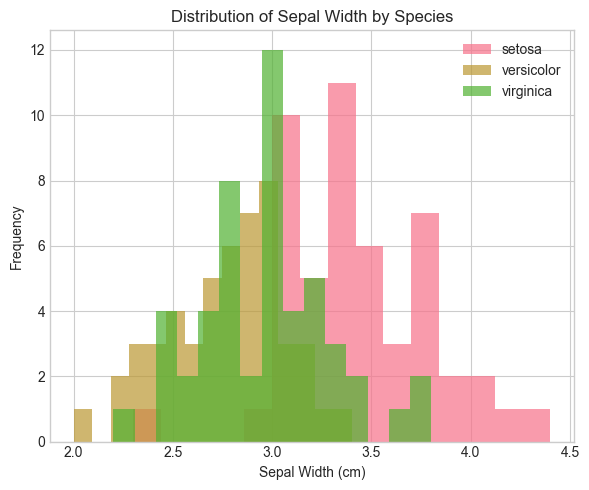

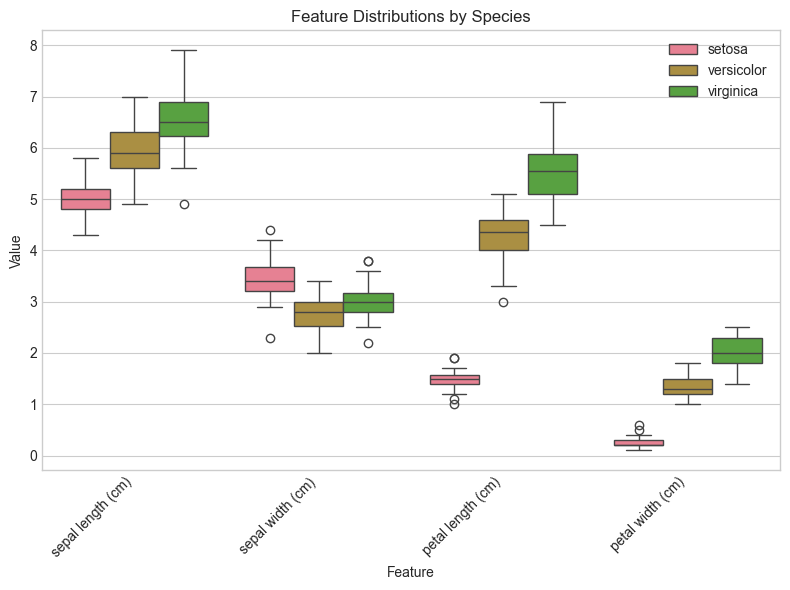

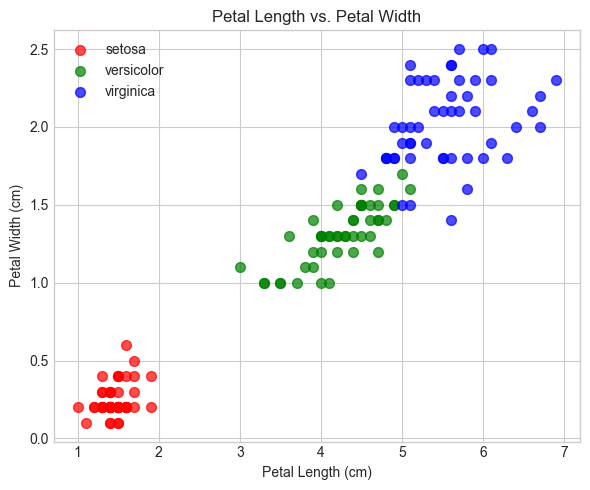

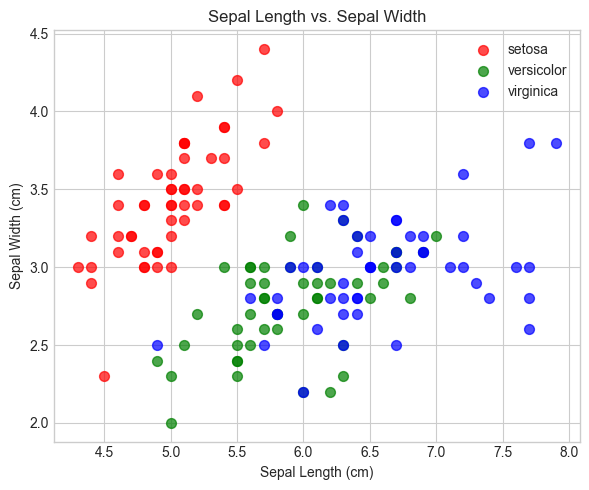

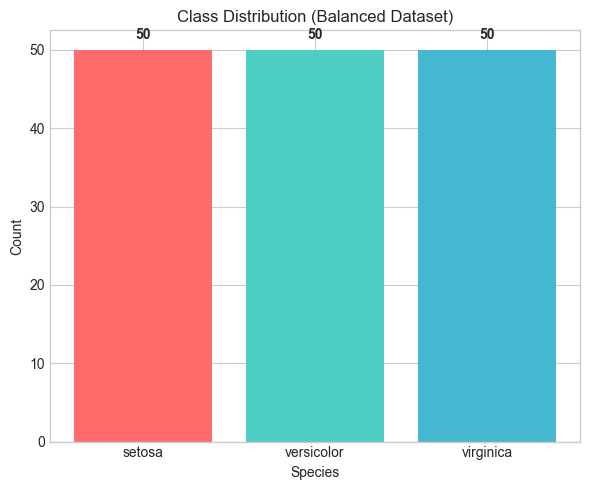


All 8 figures saved individually!



In [9]:
# Define colors for consistency
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# 1. Petal Length Distribution
print()
fig1, ax1 = plt.subplots(figsize=(6, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax1.hist(subset['petal length (cm)'], alpha=0.7, label=species, bins=15)
ax1.set_xlabel('Petal Length (cm)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Petal Length by Species')
ax1.legend()
plt.tight_layout()
plt.savefig('01_petal_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Petal Width Distribution
fig2, ax2 = plt.subplots(figsize=(6, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax2.hist(subset['petal width (cm)'], alpha=0.7, label=species, bins=15)
ax2.set_xlabel('Petal Width (cm)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Petal Width by Species')
ax2.legend()
plt.tight_layout()
plt.savefig('02_petal_width_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Sepal Length Distribution
fig3, ax3 = plt.subplots(figsize=(6, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax3.hist(subset['sepal length (cm)'], alpha=0.7, label=species, bins=15)
ax3.set_xlabel('Sepal Length (cm)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Sepal Length by Species')
ax3.legend()
plt.tight_layout()
plt.savefig('03_sepal_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Sepal Width Distribution
fig4, ax4 = plt.subplots(figsize=(6, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax4.hist(subset['sepal width (cm)'], alpha=0.7, label=species, bins=15)
ax4.set_xlabel('Sepal Width (cm)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Sepal Width by Species')
ax4.legend()
plt.tight_layout()
plt.savefig('04_sepal_width_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Box plot of all features
fig5, ax5 = plt.subplots(figsize=(8, 6))
df_melted = df.melt(id_vars=['species'], value_vars=iris.feature_names, 
                     var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value', hue='species', ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
ax5.set_title('Feature Distributions by Species')
ax5.legend(loc='upper right')
plt.tight_layout()
plt.savefig('05_boxplot_all_features.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Scatter: Petal Length vs Petal Width
fig6, ax6 = plt.subplots(figsize=(6, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax6.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                c=colors[species], label=species, alpha=0.7, s=50)
ax6.set_xlabel('Petal Length (cm)')
ax6.set_ylabel('Petal Width (cm)')
ax6.set_title('Petal Length vs. Petal Width')
ax6.legend()
plt.tight_layout()
plt.savefig('06_scatter_petal.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Scatter: Sepal Length vs Sepal Width
fig7, ax7 = plt.subplots(figsize=(6, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax7.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                c=colors[species], label=species, alpha=0.7, s=50)
ax7.set_xlabel('Sepal Length (cm)')
ax7.set_ylabel('Sepal Width (cm)')
ax7.set_title('Sepal Length vs. Sepal Width')
ax7.legend()
plt.tight_layout()
plt.savefig('07_scatter_sepal.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Bar chart of class distribution
fig8, ax8 = plt.subplots(figsize=(6, 5))
class_counts = df['species'].value_counts()
bars = ax8.bar(class_counts.index, class_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax8.set_xlabel('Species')
ax8.set_ylabel('Count')
ax8.set_title('Class Distribution (Balanced Dataset)')
for bar, count in zip(bars, class_counts.values):
    ax8.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(count), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('08_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAll 8 figures saved individually!\n")

### 1.7 Dataset Summary

The Iris dataset comprises 150 samples across three species of iris flowers (*Iris setosa*, *Iris versicolor*, and *Iris virginica*), with 50 samples per class, making it a perfectly balanced dataset. All four features are continuous numerical measurements in centimeters: sepal length, sepal width, petal length, and petal width. The dataset contains no missing values, requiring no imputation. The visualizations reveal that *Iris setosa* is linearly separable from the other two species based on petal dimensions, while *versicolor* and *virginica* show some overlap. Petal length and petal width appear to be the most discriminative features, exhibiting clear separation between classes (Pedregosa et al., 2011).

---
## Part 2: Train a Decision Tree Model

In this section, a Decision Tree classifier is trained to predict iris species based on the four morphological features.

### 2.1 Decision Tree Training

In [10]:
# Train Decision Tree with Gini criterion
dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

dt_classifier.fit(X_train, y_train)

# Get tree properties using the internal tree_ attribute (more compatible)
tree_depth = dt_classifier.tree_.max_depth
n_leaves = np.sum(dt_classifier.tree_.children_left == -1)

print("\nDecision Tree Configuration:\n")

print(f"Splitting Criterion: Gini Impurity")
print(f"Maximum Depth (parameter): 3 (regularization to prevent overfitting)")
print(f"Actual Tree Depth: {tree_depth}")
print(f"Number of Leaves: {n_leaves}\n")


Decision Tree Configuration:

Splitting Criterion: Gini Impurity
Maximum Depth (parameter): 3 (regularization to prevent overfitting)
Actual Tree Depth: 3
Number of Leaves: 5



### 2.2 Decision Tree Visualization

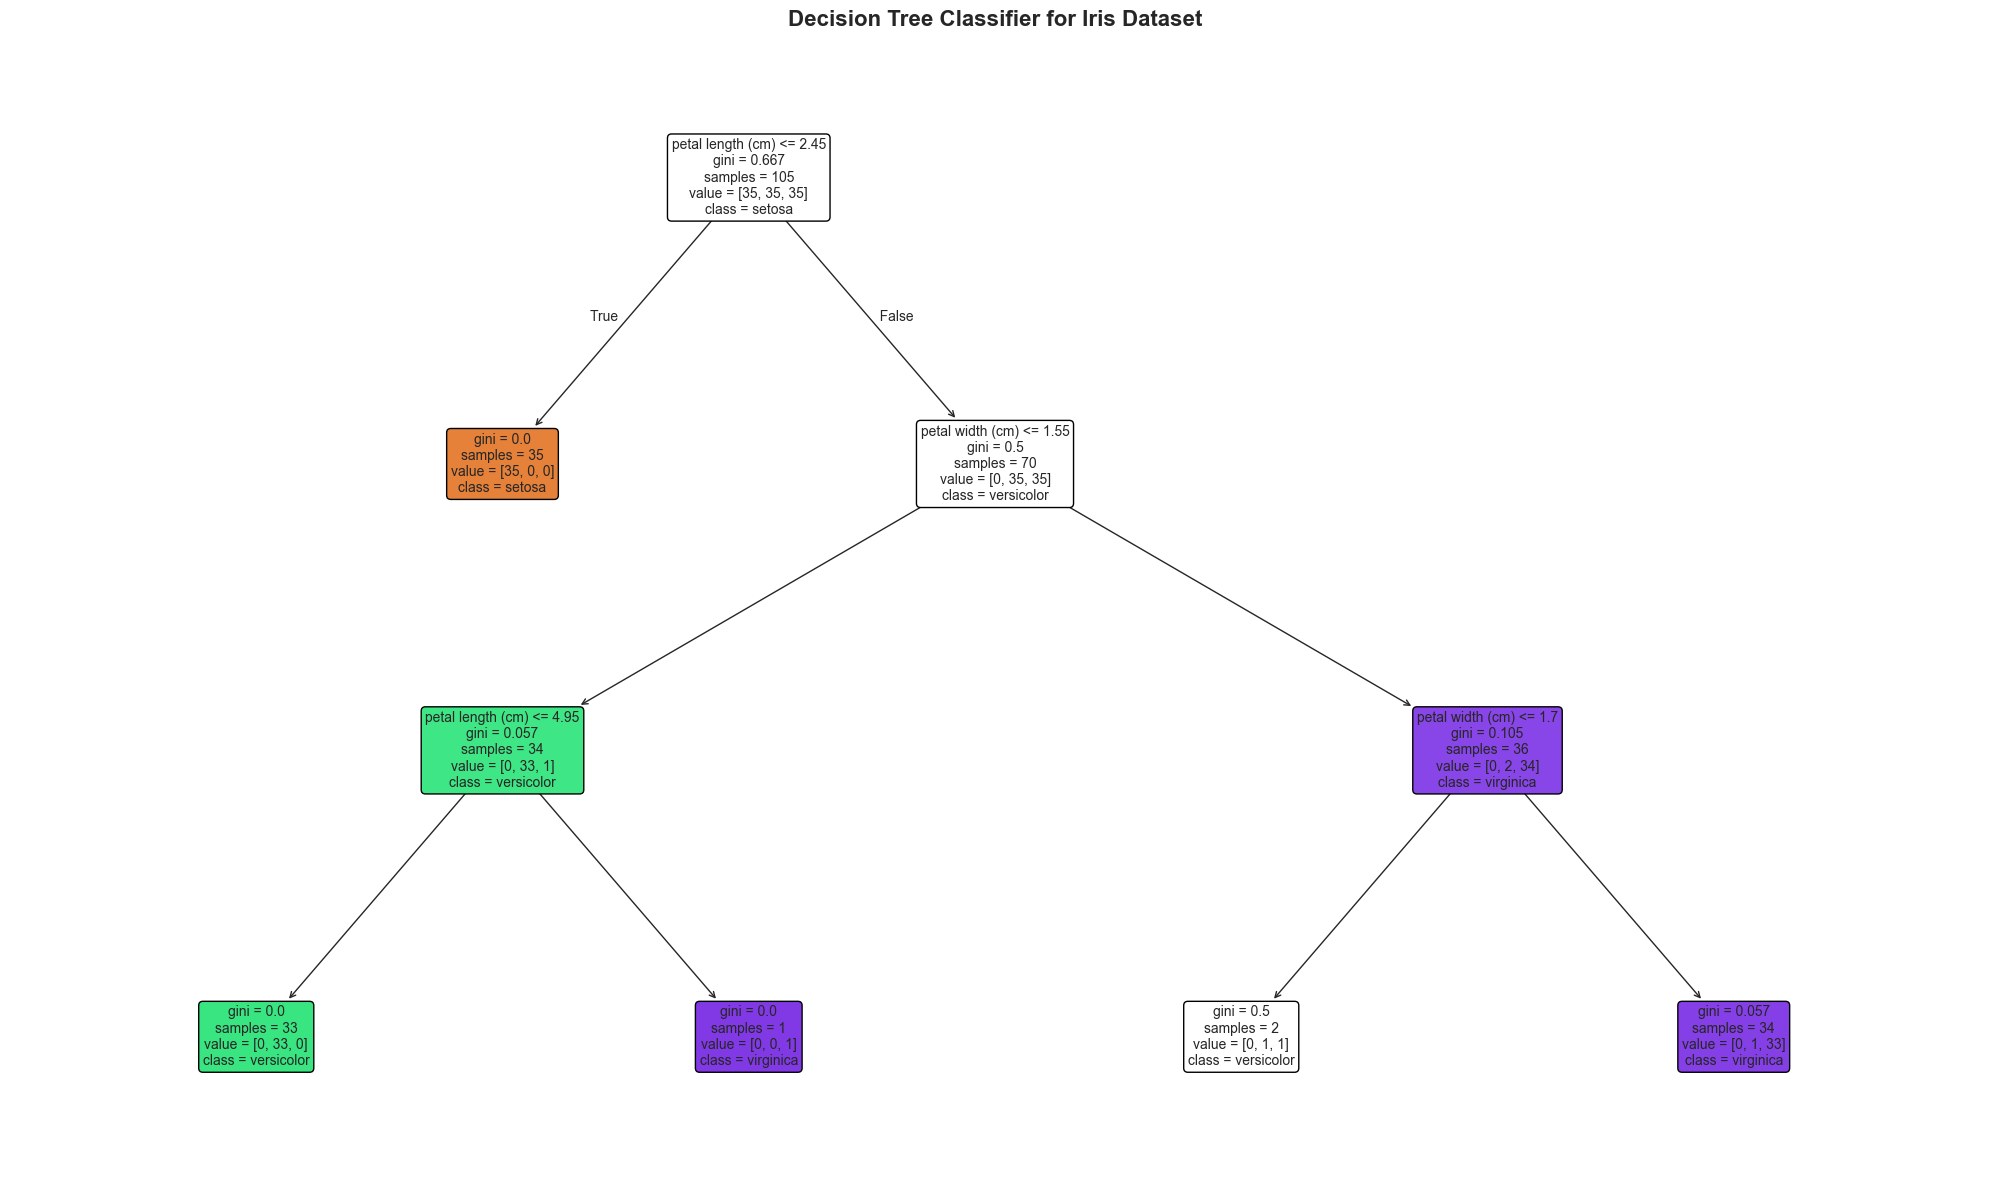

Decision tree saved as 'decision_tree_visualization.png'


In [11]:
# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(
    dt_classifier,
    feature_names=iris.feature_names,
    class_names=list(iris.target_names),
    filled=True,
    rounded=True,
    fontsize=10,
    ax=ax
)
plt.title('Decision Tree Classifier for Iris Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()

# Save the figure
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')

plt.show()

print("Decision tree saved as 'decision_tree_visualization.png'")

### 2.3 Feature Importance Analysis



          Feature  Importance
petal length (cm)    0.550877
 petal width (cm)    0.449123
sepal length (cm)    0.000000
 sepal width (cm)    0.000000


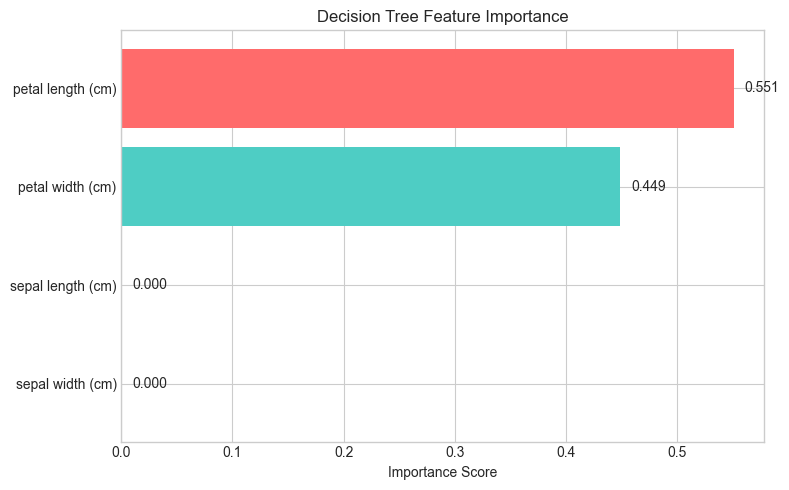

Feature importance plot saved as 'feature_importance.png'


In [12]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)
print("\n")
print(feature_importance.to_string(index=False))

# Visualize feature importance
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
ax.set_xlabel('Importance Score')
ax.set_title('Decision Tree Feature Importance')
ax.invert_yaxis()
for i, (bar, imp) in enumerate(zip(bars, feature_importance['Importance'])):
    ax.text(imp + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{imp:.3f}', va='center')
plt.tight_layout()

# Save the figure
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

plt.show()

print("Feature importance plot saved as 'feature_importance.png'")

### 2.4 Model Evaluation

In [13]:
# Predictions
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nOverfitting Gap:   {(train_accuracy - test_accuracy)*100:.2f}%")

print("\n\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


Training Accuracy: 0.9810 (98.10%)
Test Accuracy:     0.9778 (97.78%)

Overfitting Gap:   0.32%


Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



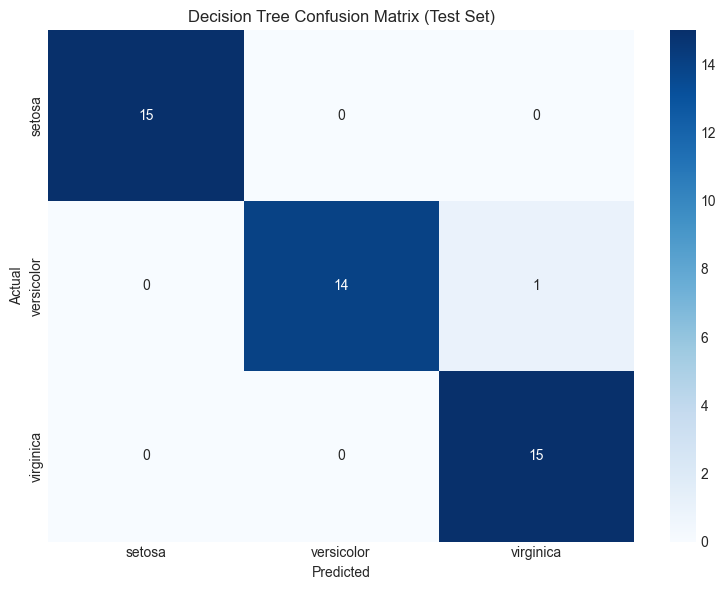

Confusion matrix saved as 'dt_confusion_matrix.png'


In [14]:
# Confusion Matrix for Decision Tree
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Decision Tree Confusion Matrix (Test Set)')
plt.tight_layout()

# Save the figure
plt.savefig('dt_confusion_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

print("Confusion matrix saved as 'dt_confusion_matrix.png'")

---
## Part 3: Model Comparison

In this section, the Decision Tree classifier is compared with Logistic Regression, a linear model that estimates class probabilities using the logistic function.

In [15]:
# Train Logistic Regression model
lr_classifier = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)

lr_classifier.fit(X_train, y_train)

# Predictions
lr_train_pred = lr_classifier.predict(X_train)
lr_test_pred = lr_classifier.predict(X_test)

# Calculate accuracies
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

print(f"\nTraining Accuracy: {lr_train_accuracy:.4f} ({lr_train_accuracy*100:.2f}%)")
print(f"Test Accuracy:     {lr_test_accuracy:.4f} ({lr_test_accuracy*100:.2f}%)")
print(f"\nOverfitting Gap:   {(lr_train_accuracy - lr_test_accuracy)*100:.2f}%\n")


Training Accuracy: 0.9714 (97.14%)
Test Accuracy:     0.9333 (93.33%)

Overfitting Gap:   3.81%



### 3.1 Model Comparison Summary

In [16]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression'],
    'Training Accuracy': [f'{train_accuracy:.4f}', f'{lr_train_accuracy:.4f}'],
    'Test Accuracy': [f'{test_accuracy:.4f}', f'{lr_test_accuracy:.4f}'],
    'Overfitting Gap': [f'{(train_accuracy - test_accuracy)*100:.2f}%', 
                        f'{(lr_train_accuracy - lr_test_accuracy)*100:.2f}%']
})

print("\n"); print(comparison_df.to_string(index=False)); print()



              Model Training Accuracy Test Accuracy Overfitting Gap
      Decision Tree            0.9810        0.9778           0.32%
Logistic Regression            0.9714        0.9333           3.81%



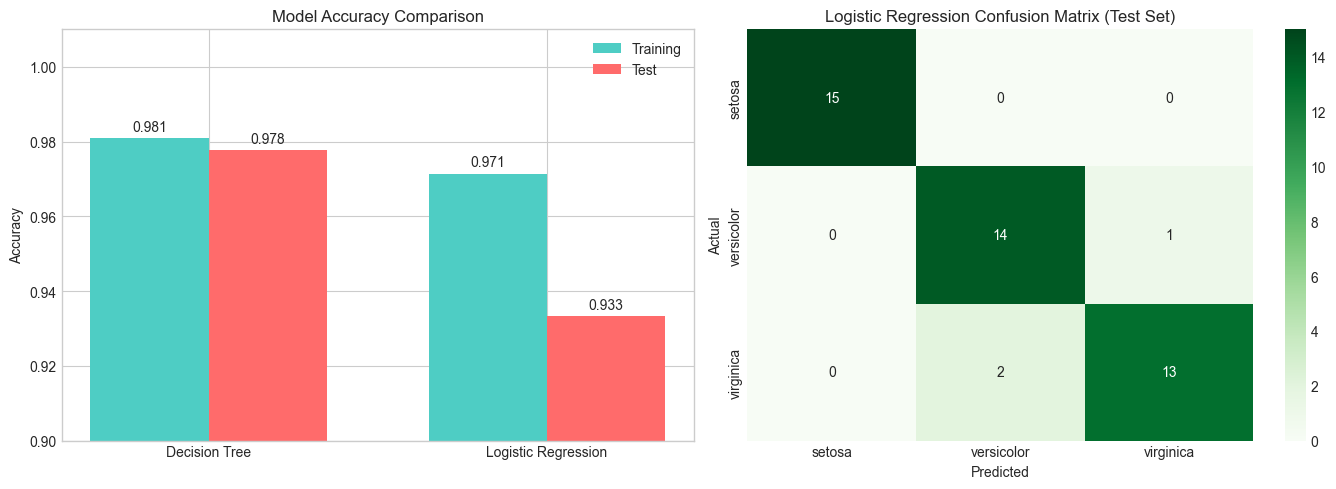

Model comparison plot saved as 'model_comparison.png'


In [17]:
# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison bar chart
ax1 = axes[0]
models = ['Decision Tree', 'Logistic Regression']
train_accs = [train_accuracy, lr_train_accuracy]
test_accs = [test_accuracy, lr_test_accuracy]
x = np.arange(len(models))
width = 0.35
bars1 = ax1.bar(x - width/2, train_accs, width, label='Training', color='#4ECDC4')
bars2 = ax1.bar(x + width/2, test_accs, width, label='Test', color='#FF6B6B')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim([0.9, 1.01])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

# Confusion matrix for Logistic Regression
ax2 = axes[1]
cm_lr = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, yticklabels=iris.target_names, ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Logistic Regression Confusion Matrix (Test Set)')
plt.tight_layout()

# Save the figure
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

print("Model comparison plot saved as 'model_comparison.png'")

### 3.2 Analysis: Why Do the Models Perform Differently?

Both models achieve high accuracy on the Iris dataset due to its relatively simple, linearly separable structure. However, subtle differences emerge from their fundamental approaches:

**Decision Trees** partition the feature space using axis-parallel splits, creating rectangular decision regions. They excel when features have clear threshold-based relationships with the target but can overfit by memorizing training data if not regularized (Breiman et al., 1984).

**Logistic Regression** learns linear decision boundaries in the feature space, computing class probabilities via the softmax function. It tends to generalize better on linearly separable data and is less prone to overfitting, though it cannot capture complex non-linear relationships without feature engineering (Hosmer et al., 2013).

On the Iris dataset, both models perform comparably because the classes are largely linearly separable by petal dimensions. The Decision Tree's axis-aligned splits effectively approximate the linear boundaries that Logistic Regression learns directly.

---
## Part 4: Conceptual Questions

### Q1: Why are decision trees considered greedy algorithms?

Decision trees are greedy because they make locally optimal decisions at each node without considering future splits or global optimization. At each split, the algorithm selects the feature and threshold that maximizes immediate impurity reduction (Gini or entropy), without backtracking to explore whether a different split might lead to a better overall tree structure (Mitchell, 1997).

### Q2: Why are decision trees unstable?

Decision trees exhibit high variance, meaning small changes in the training data can produce dramatically different tree structures. This instability arises because early splits affect all subsequent decisions; if the root split changes, the entire tree topology changes. This sensitivity makes individual trees unreliable, which is why ensemble methods like Random Forests average many trees to reduce variance (Breiman, 2001).

### Q3: What does inductive bias mean in the context of decision trees?

Inductive bias refers to the assumptions a learning algorithm makes to generalize from training data to unseen instances. For decision trees, the primary inductive bias is a preference for shorter trees (Occam's Razor) and placing high-information-gain attributes near the root. This bias assumes that simpler explanations are more likely to be correct and that some features are more predictive than others (Mitchell, 1997).

### Q4: Why can decision trees favor features with many categories?

When using information gain (entropy), features with many unique values can artificially appear more informative because they create purer splits simply by having more categories. A feature with *n* unique values can perfectly separate *n* groups regardless of actual predictive value, leading to overfitting. Gain ratio, which normalizes by intrinsic information, was introduced to mitigate this bias (Quinlan, 1993).

### Q5: When would you NOT recommend using a decision tree?

Decision trees are not recommended when: (1) the data requires capturing complex non-axis-aligned boundaries, since trees only make orthogonal splits; (2) high stability is required, as small data changes cause large structural changes; or (3) the dataset has high-cardinality categorical features without proper handling, which can lead to overfitting. For such scenarios, ensemble methods, SVMs, or neural networks are often preferable (Hastie et al., 2009).

---
## References

Breiman, L. (2001). Random forests. *Machine Learning, 45*(1), 5-32. https://doi.org/10.1023/A:1010933404324

Breiman, L., Friedman, J., Stone, C. J., & Olshen, R. A. (1984). *Classification and regression trees*. CRC Press.

Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics, 7*(2), 179-188.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The elements of statistical learning: Data mining, inference, and prediction* (2nd ed.). Springer.

Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). *Applied logistic regression* (3rd ed.). Wiley.

Mitchell, T. M. (1997). *Machine learning*. McGraw-Hill.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825-2830.

Quinlan, J. R. (1993). *C4.5: Programs for machine learning*. Morgan Kaufmann.